In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import GEOparse as geo
import re

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2336813/
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE11224

In [2]:
geo_path = '/Users/bendalllab/Documents/PlacentaMAExpression'

In [3]:
gse = geo.get_GEO(geo='GSE11220', destdir= geo_path)

07-Jul-2020 13:53:50 DEBUG utils - Directory /Users/bendalllab/Documents/PlacentaMAExpression already exists. Skipping.
07-Jul-2020 13:53:50 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11220/soft/GSE11220_family.soft.gz to /Users/bendalllab/Documents/PlacentaMAExpression/GSE11220_family.soft.gz
100%|██████████| 21.8M/21.8M [00:59<00:00, 382kB/s]   
07-Jul-2020 13:54:53 DEBUG downloader - Size validation passed
07-Jul-2020 13:54:53 DEBUG downloader - Moving /var/folders/6h/p430wr994951_g4zhrt6gpjm0000gn/T/tmpzaa0i8zg to /Users/bendalllab/Documents/PlacentaMAExpression/GSE11220_family.soft.gz
07-Jul-2020 13:54:53 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11220/soft/GSE11220_family.soft.gz
07-Jul-2020 13:54:53 INFO GEOparse - Parsing /Users/bendalllab/Documents/PlacentaMAExpression/GSE11220_family.soft.gz: 
07-Jul-2020 13:54:53 DEBUG GEOparse - DATABASE: GeoMiame
07-Jul-2020 13:54:53 DEBUG GEOparse - SERI

In [4]:
print("GSM example:")
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print ("Table data:",)
    print (gsm.table.head())
    break

print()
print("GPL example:")
for gpl_name, gpl in gse.gpls.items():
    print("Name: ", gpl_name)
    print("Metadata:",)
    for key, value in gpl.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print("Table data:",)
    print(gpl.table.head())
    break


GSM example:
Name:  GSM282760
Metadata:
 - title : Placenta e8.5, biological rep1, technical rep1
 - geo_accession : GSM282760
 - status : Public on Apr 23 2008
 - submission_date : Apr 21 2008
 - last_update_date : Aug 28 2018
 - type : RNA
 - channel_count : 1
 - source_name_ch1 : Mouse placental tissue at embryonic day 8.5, biological replicate 1, technical replicate 1
 - organism_ch1 : Mus musculus
 - taxid_ch1 : 10090
 - characteristics_ch1 : Strain: Swiss Webster, Tissue: placenta (fetal origin)
 - treatment_protocol_ch1 : Placentas were manually dissected into fetal placenta and decidual (maternal) portions, using fine forceps to separate the decidua from the spongiotrophoblast and trophoblast giant cells.  Fetally derived placenta samples and maternally derived placenta samples were pooled separately for each litter, then flash frozen in liquid nitrogen and stored at –80° C until RNA isolation.  Tissues from two to ten placentas from a single litter were combined for each sampl

In [5]:
gse.gpls['GPL1261'].columns

,description
ID,"Affymetrix Probe Set ID LINK_PRE:""https://www...."
GB_ACC,"GenBank Accession Number LINK_PRE:""http://www...."
SPOT_ID,identifies controls
Species Scientific Name,The genus and species of the organism represen...
Annotation Date,The date that the annotations for this probe a...
Sequence Type,
Sequence Source,The database from which the sequence used to d...
Target Description,
Representative Public ID,The accession number of a representative seque...
Gene Title,Title of Gene represented by the probe set.


In [6]:
gse.gsms['GSM282760'].columns

,description
ID_REF,
VALUE,dCHIP absolute expression value.


In [55]:
print(gse.phenotype_data[['title', 'source_name_ch1']])

                                                    title  \
GSM282760  Placenta e8.5, biological rep1, technical rep1   
GSM282761  Placenta e8.5, biological rep2, technical rep1   
GSM282762  Placenta e8.5, biological rep1, technical rep2   
GSM282763  Placenta e8.5, biological rep2, technical rep2   
GSM282764                  Placenta e8.5, biological rep3   
GSM282765                  Placenta e9.0, biological rep1   
GSM282766                  Placenta e9.0, biological rep2   
GSM282767                  Placenta e9.0, biological rep3   
GSM282768                 Placenta e10.5, biological rep1   
GSM282769                 Placenta e10.5, biological rep2   
GSM282770                 Placenta e10.5, biological rep3   
GSM282771                 Placenta e12.0, biological rep1   
GSM282772                 Placenta e12.0, biological rep2   
GSM282773                 Placenta e12.0, biological rep3   
GSM282774                 Placenta e13.5, biological rep1   
GSM282775               

going to use one example of placenta and decidua for each day as control

In [56]:
controls = ['GSM282760', 'GSM282765', 'GSM282768', 'GSM282771', 'GSM282774', 'GSM282776', 'GSM282779', 'GSM282782', 'GSM282784', # Placentas
           'GSM282786', 'GSM282790', 'GSM282792', 'GSM282794', 'GSM282796', 'GSM282798', 'GSM282800', 'GSM282802' # Deciduas
           ]

In [57]:
pivoted_control_samples = gse.pivot_samples('VALUE')[controls]
pivoted_control_samples.head()

name,GSM282760,GSM282765,GSM282768,GSM282771,GSM282774,GSM282776,GSM282779,GSM282782,GSM282784,GSM282786,GSM282790,GSM282792,GSM282794,GSM282796,GSM282798,GSM282800,GSM282802
ID_REF,,,,,,,,,,,,,,,,,
1415670_at,1872.895,1292.849,2053.661,2165.266,1473.093,1410.998,1110.351,886.797,1059.304,1545.644,1229.126,1129.286,1174.083,1015.084,1049.909,1040.134,1189.539
1415671_at,2009.660,1487.232,2569.527,2652.674,2819.819,3143.484,2244.108,2112.238,2255.396,2356.621,2317.402,2153.170,1980.880,1793.334,1733.752,2234.726,2412.492
1415672_at,3036.163,3041.732,1701.331,2954.272,2717.785,3373.331,3474.581,3466.224,3866.052,3120.375,2837.147,3168.135,3219.102,3213.740,3031.669,2276.526,2794.134
1415673_at,1734.238,1006.975,842.294,727.453,511.354,632.251,589.312,631.006,608.499,202.999,213.678,211.616,169.025,223.255,268.671,320.639,347.349
1415674_a_at,850.072,720.844,1024.391,931.032,734.169,901.751,730.848,715.982,838.831,653.064,686.557,677.277,818.992,859.787,730.493,984.525,1009.343


In [58]:
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['legend.fontsize'] = 20
sns.set_style('ticks')

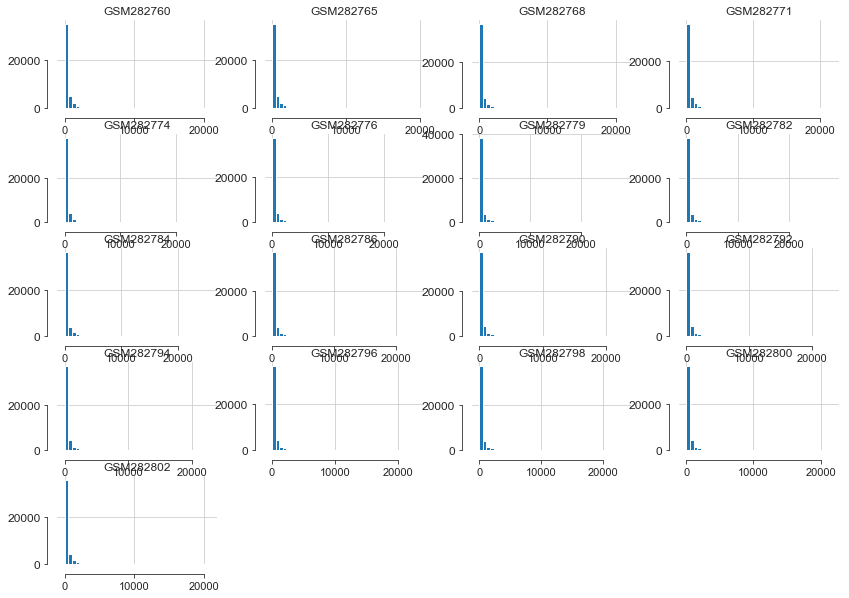

In [70]:
pivoted_control_samples.hist(bins=40)
sns.despine(offset=10, trim=True)

Next we would like to filter out probes that are not expressed. The gene is expressed (in definition here) when its average log2 intensity in control samples is above 0.25 quantile. I.e. we filter out worst 25% genes.

In [60]:
pivoted_control_samples_average = pivoted_control_samples.median(axis=1)
print('Number of probes before filtering: ', len(pivoted_control_samples_average))

Number of probes before filtering:  45101


In [61]:
expression_threshold = pivoted_control_samples_average.quantile(0.25)

In [62]:
expressed_probes = pivoted_control_samples_average[pivoted_control_samples_average >= expression_threshold].index.tolist()
print('Number of probes above threshold: ', len(expressed_probes))

Number of probes above threshold:  33827


In [63]:
samples = gse.pivot_samples('VALUE').ix[expressed_probes]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [64]:
samples.head(5)

name,GSM282760,GSM282761,GSM282762,GSM282763,GSM282764,GSM282765,GSM282766,GSM282767,GSM282768,GSM282769,...,GSM282794,GSM282795,GSM282796,GSM282797,GSM282798,GSM282799,GSM282800,GSM282801,GSM282802,GSM282803
ID_REF,,,,,,,,,,,,,,,,,,,,,
1415670_at,1872.895,1994.018,2166.414,1996.905,2000.288,1292.849,2158.744,2637.442,2053.661,2382.022,...,1174.083,1156.185,1015.084,1308.045,1049.909,983.858,1040.134,1110.469,1189.539,960.338
1415671_at,2009.660,1845.056,1936.132,1911.540,1655.053,1487.232,1782.198,2093.416,2569.527,2187.464,...,1980.880,2309.216,1793.334,2351.799,1733.752,1850.153,2234.726,2262.522,2412.492,1932.857
1415672_at,3036.163,2974.403,2576.822,2690.146,2204.565,3041.732,2998.225,2209.298,1701.331,2189.580,...,3219.102,2975.996,3213.740,3518.862,3031.669,3145.480,2276.526,3442.641,2794.134,2957.314
1415673_at,1734.238,1625.301,1821.850,1509.579,760.094,1006.975,896.498,840.031,842.294,961.257,...,169.025,186.011,223.255,232.689,268.671,211.027,320.639,191.192,347.349,137.644
1415674_a_at,850.072,858.504,909.241,943.644,967.721,720.844,841.939,867.711,1024.391,917.212,...,818.992,704.705,859.787,746.851,730.493,779.958,984.525,816.347,1009.343,710.763


In [181]:
samples_probes = samples.transpose()

In [182]:
samples_probes.head(5)

ID_REF,1415670_at,1415671_at,1415672_at,1415673_at,1415674_a_at,1415675_at,1415676_a_at,1415677_at,1415678_at,1415679_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM282760,1872.895,2009.660,3036.163,1734.238,850.072,1033.273,5152.135,1187.637,1372.216,1977.704,...,694.701,571.972,600.460,435.843,1329.611,929.803,4678.071,4079.542,15923.369,14202.229
GSM282761,1994.018,1845.056,2974.403,1625.301,858.504,1136.727,5419.496,982.151,1308.887,1902.553,...,498.778,640.870,745.188,599.133,1431.202,1078.896,4915.530,4671.341,16186.424,14820.677
GSM282762,2166.414,1936.132,2576.822,1821.850,909.241,1320.769,5569.779,972.891,1305.232,1860.932,...,652.735,641.101,589.175,455.502,1242.338,886.203,3849.558,3877.205,14063.651,12676.330
GSM282763,1996.905,1911.540,2690.146,1509.579,943.644,1099.842,5490.278,986.988,1302.791,1996.718,...,558.685,608.303,621.276,553.076,1444.475,1101.322,4744.079,4625.969,15548.264,13755.987
GSM282764,2000.288,1655.053,2204.565,760.094,967.721,1513.897,5644.398,1020.987,1092.878,2229.206,...,467.507,382.747,301.096,273.991,781.321,588.971,3733.563,3794.186,11534.323,9406.109


In [183]:
gene_id = pd.DataFrame(gse.gpls['GPL1261'].table[['ID', 'Gene Symbol']])

In [184]:
gene_id.set_index('ID', inplace = True)

In [185]:
gene_id_dict = gene_id.to_dict()

In [186]:
gene_id_dict

{'Gene Symbol': {'1415670_at': 'Copg1',
  '1415671_at': 'Atp6v0d1',
  '1415672_at': 'Golga7',
  '1415673_at': 'Psph',
  '1415674_a_at': 'Trappc4',
  '1415675_at': 'Dpm2',
  '1415676_a_at': 'Psmb5',
  '1415677_at': 'Dhrs1',
  '1415678_at': 'Ppm1a',
  '1415679_at': 'Psenen',
  '1415680_at': 'Anapc1',
  '1415681_at': 'Mrpl43',
  '1415682_at': 'Xpo7',
  '1415683_at': 'Nmt1',
  '1415684_at': 'Atg5',
  '1415685_at': 'Mtif2',
  '1415686_at': 'Rab14',
  '1415687_a_at': 'Psap',
  '1415688_at': 'Ube2g1',
  '1415689_s_at': 'Zkscan3',
  '1415690_at': 'Mrpl27',
  '1415691_at': 'Dlg1',
  '1415692_s_at': 'Canx',
  '1415693_at': 'Derl1',
  '1415694_at': 'Wars',
  '1415695_at': 'Psma1',
  '1415696_at': 'Sar1a',
  '1415697_at': 'G3bp2',
  '1415698_at': 'Golm1',
  '1415699_a_at': 'Gps1',
  '1415700_a_at': 'Ssr3',
  '1415701_x_at': 'LOC100044627 /// LOC100862455 /// Rpl23',
  '1415702_a_at': 'Ctbp1',
  '1415703_at': 'Huwe1',
  '1415704_a_at': 'Cdv3',
  '1415705_at': 'Smim7',
  '1415706_at': 'Copa',
  '141

In [187]:
samples_probes.columns = samples_probes.columns.map(gene_id_dict['Gene Symbol'])

In [188]:
samples_probes.head(5)

ID_REF,Copg1,Atp6v0d1,Golga7,Psph,Trappc4,Dpm2,Psmb5,Dhrs1,Ppm1a,Psenen,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
name,,,,,,,,,,,,,,,,,,,,,
GSM282760,1872.895,2009.660,3036.163,1734.238,850.072,1033.273,5152.135,1187.637,1372.216,1977.704,...,694.701,571.972,600.460,435.843,1329.611,929.803,4678.071,4079.542,15923.369,14202.229
GSM282761,1994.018,1845.056,2974.403,1625.301,858.504,1136.727,5419.496,982.151,1308.887,1902.553,...,498.778,640.870,745.188,599.133,1431.202,1078.896,4915.530,4671.341,16186.424,14820.677
GSM282762,2166.414,1936.132,2576.822,1821.850,909.241,1320.769,5569.779,972.891,1305.232,1860.932,...,652.735,641.101,589.175,455.502,1242.338,886.203,3849.558,3877.205,14063.651,12676.330
GSM282763,1996.905,1911.540,2690.146,1509.579,943.644,1099.842,5490.278,986.988,1302.791,1996.718,...,558.685,608.303,621.276,553.076,1444.475,1101.322,4744.079,4625.969,15548.264,13755.987
GSM282764,2000.288,1655.053,2204.565,760.094,967.721,1513.897,5644.398,1020.987,1092.878,2229.206,...,467.507,382.747,301.096,273.991,781.321,588.971,3733.563,3794.186,11534.323,9406.109


remove probes without gene symbol

In [189]:
samples_probes.columns.duplicated()

array([False, False, False, ...,  True,  True,  True])

In [190]:
samples_probes = samples_probes.loc[:,~ samples_probes.columns.duplicated()]

In [191]:
samples_probes.filter(regex='///').columns

Index(['LOC100044627 /// LOC100862455 /// Rpl23', 'Rps27 /// Rps27rt',
       'Gm8069 /// Tomm5', 'Zbed6 /// Zc3h11a', 'LOC101056240 /// Sumo2',
       'Dazap2 /// Gm2444', 'Gm15210 /// Impdh2', 'Snrpn /// Snurf',
       'Gm15483 /// LOC102642137 /// Rps13 /// Rps13-ps4', 'Gm5621 /// Rpl10',
       ...
       'Hsd3b2 /// Hsd3b3 /// Hsd3b6', 'Gm2382 /// Mthfs',
       'Gm12854 /// Gm5068 /// S100a11',
       'Csprs /// Gm15433 /// Gm2666 /// Gm7609 /// LOC100041903 /// LOC100503923 /// LOC101055758',
       'Rps19 /// Rps19-ps3', 'Tagap /// Tagap1',
       '1700047I17Rik2 /// Fam177a /// LOC100503822', '6330564D18Rik /// Yod1',
       'Gm10651 /// Josd1', 'Acrbp /// Ing4'],
      dtype='object', name='ID_REF', length=765)

In [192]:
# remove probes with more than one gene assigned
samples_probes.drop(samples_probes.filter(regex='///').columns, axis = 1, inplace = True)

In [193]:
gene_names_pd = pd.DataFrame({'Gene Symbol':samples_probes.columns})

In [194]:
geo_path = '/Users/bendalllab/Documents/PlacentaMAExpression'
gene_csv = '20200707_gene_names.csv'
gene_filepath = os.path.join(geo_path, gene_csv)
gene_names_pd.to_csv(gene_filepath, index = False)

In [195]:
experiments = {}
for i, (idx, row) in enumerate(gse.phenotype_data.iterrows()):
    tmp = {}
    tmp['Experiment'] = idx
    tmp['Tissue'] = re.search('Placenta|Decidua', row['title']).group()
    tmp['Day'] = re.search('e\d+\.\d*|P\d+', row['title']).group()
    experiments[i] = tmp
experiments = pd.DataFrame(experiments).T

In [196]:
experiments.set_index('Experiment', inplace = True)

In [197]:
experiments.head(5)

,Day,Tissue
Experiment,,
GSM282760,e8.5,Placenta
GSM282761,e8.5,Placenta
GSM282762,e8.5,Placenta
GSM282763,e8.5,Placenta
GSM282764,e8.5,Placenta


In [198]:
all_samples = pd.concat([samples_probes, experiments], axis=1)

In [199]:
all_samples.head(5)

,Copg1,Atp6v0d1,Golga7,Psph,Trappc4,Dpm2,Psmb5,Dhrs1,Ppm1a,Psenen,...,Adss,Eif2b1,Ppl,Col9a3,Zmiz2,D17Wsu92e,Alg3,Gapdh,Day,Tissue
GSM282760,1872.895,2009.660,3036.163,1734.238,850.072,1033.273,5152.135,1187.637,1372.216,1977.704,...,2394.838,1850.882,455.669,358.432,792.224,853.210,609.980,12767.387,e8.5,Placenta
GSM282761,1994.018,1845.056,2974.403,1625.301,858.504,1136.727,5419.496,982.151,1308.887,1902.553,...,2339.066,1785.850,359.063,290.264,675.436,846.232,598.534,12523.641,e8.5,Placenta
GSM282762,2166.414,1936.132,2576.822,1821.850,909.241,1320.769,5569.779,972.891,1305.232,1860.932,...,2454.537,2052.143,568.463,304.577,798.864,967.778,665.108,13243.183,e8.5,Placenta
GSM282763,1996.905,1911.540,2690.146,1509.579,943.644,1099.842,5490.278,986.988,1302.791,1996.718,...,2411.364,1955.034,405.967,284.239,708.995,848.011,646.137,12654.611,e8.5,Placenta
GSM282764,2000.288,1655.053,2204.565,760.094,967.721,1513.897,5644.398,1020.987,1092.878,2229.206,...,1457.396,1893.921,465.729,346.359,893.819,1009.600,680.938,12725.588,e8.5,Placenta


In [173]:
gene_info_go = pd.DataFrame(gse.gpls['GPL1261'].table[['ID', 'ENTREZ_GENE_ID', 'Gene Symbol', 'Gene Ontology Biological Process', 'Gene Ontology Cellular Component', 'Gene Ontology Molecular Function']])

In [180]:
gene_info_go.head(50)

,ID,ENTREZ_GENE_ID,Gene Symbol,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1415670_at,54161,Copg1,0006810 // transport // inferred from electron...,0000139 // Golgi membrane // not recorded /// ...,0005198 // structural molecule activity // inf...
1,1415671_at,11972,Atp6v0d1,0006200 // ATP catabolic process // inferred f...,0005765 // lysosomal membrane // not recorded ...,0005515 // protein binding // inferred from el...
2,1415672_at,57437,Golga7,0006893 // Golgi to plasma membrane transport ...,0000139 // Golgi membrane // not recorded /// ...,NaN
3,1415673_at,100678,Psph,0006563 // L-serine metabolic process // not r...,0005737 // cytoplasm // not recorded /// 00430...,0000287 // magnesium ion binding // not record...
4,1415674_a_at,60409,Trappc4,0006810 // transport // inferred from electron...,0005622 // intracellular // inferred from elec...,0005515 // protein binding // inferred from ph...
5,1415675_at,13481,Dpm2,0006486 // protein glycosylation // inferred f...,0000506 // glycosylphosphatidylinositol-N-acet...,0004582 // dolichyl-phosphate beta-D-mannosylt...
6,1415676_a_at,19173,Psmb5,0006508 // proteolysis // inferred from electr...,0000502 // proteasome complex // inferred from...,0004175 // endopeptidase activity // inferred ...
7,1415677_at,52585,Dhrs1,0008152 // metabolic process // inferred from ...,0005739 // mitochondrion // inferred from dire...,0016491 // oxidoreductase activity // inferred...
8,1415678_at,19042,Ppm1a,0006470 // protein dephosphorylation // inferr...,0005634 // nucleus // not recorded /// 0005737...,0000287 // magnesium ion binding // inferred f...
9,1415679_at,66340,Psenen,0006509 // membrane protein ectodomain proteol...,0005783 // endoplasmic reticulum // not record...,0005515 // protein binding // inferred from ph...


Running entrez_gene_ids through DAVID https://david.ncifcrf.gov/gene2gene.jsp just to make sure everything is current, hmm says they can't process more than 3k genes

In [203]:
expressed_genes = gene_names_pd['Gene Symbol'].tolist()

In [205]:
gene_info_exp_only = gene_info_go[gene_info_go['Gene Symbol'].isin(expressed_genes)]

In [212]:
len(gene_info_exp_only)

39591

In [214]:
GO_counts = pd.DataFrame(data = gene_info_exp_only.groupby('Gene Ontology Biological Process').apply(len))
GO_counts.rename(columns= {0: 'counts'}, inplace = True)
GO_counts.sort_values('counts', ascending = False, inplace = True)

In [227]:
len(GO_counts)

10777

In [224]:
GO_func_counts = pd.DataFrame(data = gene_info_exp_only.groupby('Gene Ontology Molecular Function').apply(len))
GO_func_counts.rename(columns= {0: 'counts'}, inplace = True)
GO_func_counts.sort_values('counts', ascending = False, inplace = True)

In [226]:
len(GO_func_counts)

9944

In [67]:
days = ['e8.5',
             'e9.0',
             'e10.5',
             'e12.0',
             'e15.0',
             'e17.0',
             'e19.0',
             'P0']